### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 2. Loading data as numpy array from csv database files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop = True)

In [3]:
print('Shape of Training Data: ', train.shape)

Shape of Training Data:  (20800, 5)


In [4]:
print('\n \n TRAIN \n', train.head())
print('\n \n TEST \n', test.head())


 
 TRAIN 
    id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  

 
 TEST 
                                                    title  \
id                                                         
2080

### 3. Cleaning Data

In [5]:
print('\n \nNumber of Null values in Train Set: ', train['text'].isna().sum())
print('Number of Null values in Test Set: ', test['text'].isna().sum())

# Dropping rows with NaN
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')


 
Number of Null values in Train Set:  39
Number of Null values in Test Set:  7


### 4. Exploratory Data Analysis (EDA)

In [6]:
length = []
[length.append(len(str(text))) for text in train['text']]
train['length'] = length

print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

Minimum Length:  1 
Maximum Length:  142961 
Average Length:  4553


In [7]:
print('Number of articles with less than 50 words: ', len(train[train['length'] < 50]))

Number of articles with less than 50 words:  207


In [8]:
print(train['text'][train['length'] < 50])
train = train.drop(train['text'][train['length'] < 50].index, axis = 0)

print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

82                                                   
169                                                  
173                                   Guest   Guest  
196            They got the heater turned up on high.
295                                                  
                             ...                     
20350                         I hope nobody got hurt!
20418                                 Guest   Guest  
20431    \nOctober 28, 2016 The Mothers by stclair by
20513                                                
20636                              Trump all the way!
Name: text, Length: 207, dtype: object
Minimum Length:  50 
Maximum Length:  142961 
Average Length:  4598


### 5. Splitting data into training and testing sets

In [9]:
train_labels = train['label']
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

### 6. Setting up Term Frequency (Tf) - Inverse Document Frequency Vectorizer (IdfVectorizer)

In [10]:
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [11]:
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['text'])

In [12]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

# Predicting on the test set
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 96.98%


### 7. Evaluating the model

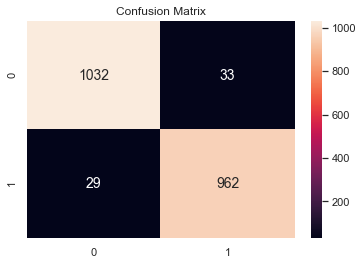


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1065
           1       0.97      0.97      0.97       991

    accuracy                           0.97      2056
   macro avg       0.97      0.97      0.97      2056
weighted avg       0.97      0.97      0.97      2056



In [13]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()

# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))